In [1]:
#All libraries import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from matplotlib import style
from sklearn.preprocessing import MinMaxScaler as msc


In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
dataset.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [4]:
print(dataset.shape)
print(dataset.dtypes)
print(dataset.isnull().sum())

(2035, 8)
Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object
Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64


<AxesSubplot:xlabel='Total Trade Quantity', ylabel='Turnover (Lacs)'>

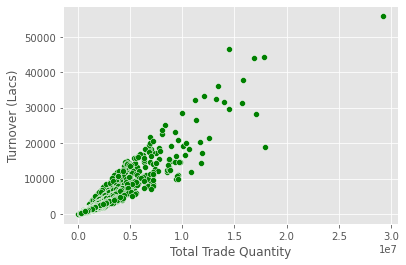

In [7]:
style.use("ggplot")
sb.scatterplot(x="Total Trade Quantity" , y="Turn Over Lacs", data=dataset ,color="green")

In [13]:
train_data=dataset.iloc[:, 1:2].values
print(train_data)
scaler_data = msc(feature_range = (0, 1))
train_new_data = scaler_data.fit_transform(train_data)
print(train_new_data)

[[234.05]
 [234.55]
 [240.  ]
 ...
 [121.8 ]
 [120.3 ]
 [122.1 ]]
[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.16504461]
 [0.15896188]
 [0.16626115]]


In [14]:
y_train = []
x_train = []

for x in range(60,2035):
    x_train.append(train_new_data[x-60:x,0])
    y_train.append(train_new[x,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [19]:
regression = Sequential()

regression.add(LSTM(units = 50 , return_sequences = True , input_shape = (x_train.shape[1],1)))
regression.add(Dropout(.2))
regression.add(LSTM(units = 50 , return_sequences = True))
regression.add(Dropout(.2))
regression.add(LSTM(units = 50 , return_sequences = True))
regression.add(Dropout(.2))
regression.add(LSTM(units = 50))
regression.add(Dropout(.2))
regression.add(Dense(units = 1))
regression.compile(optimizer = 'adam' , loss= 'MSE')
regression.fit(x_train,y_train,epochs = 100 , batch_size =32)

Epoch 1/100
62/62 [==============================] - 10s 155ms/step - loss: 0.0119
Epoch 2/100
62/62 [==============================] - 9s 146ms/step - loss: 0.0032
Epoch 3/100
62/62 [==============================] - 9s 145ms/step - loss: 0.0029
Epoch 4/100
62/62 [==============================] - 9s 147ms/step - loss: 0.0026
Epoch 5/100
62/62 [==============================] - 9s 147ms/step - loss: 0.0024
Epoch 6/100
62/62 [==============================] - 9s 150ms/step - loss: 0.0023
Epoch 7/100
62/62 [==============================] - 9s 144ms/step - loss: 0.0023
Epoch 8/100
62/62 [==============================] - 9s 147ms/step - loss: 0.0021
Epoch 9/100
62/62 [==============================] - 9s 146ms/step - loss: 0.0019
Epoch 10/100
62/62 [==============================] - 9s 144ms/step - loss: 0.0021
Epoch 11/100
62/62 [==============================] - 9s 147ms/step - loss: 0.0021
Epoch 12/100
62/62 [==============================] - 9s 146ms/step - loss: 0.0021
Epoch 13/100

62/62 [==============================] - 10s 153ms/step - loss: 6.4383e-04
Epoch 97/100
62/62 [==============================] - 9s 147ms/step - loss: 7.8607e-04
Epoch 98/100
62/62 [==============================] - 9s 143ms/step - loss: 5.4886e-04
Epoch 99/100
62/62 [==============================] - 9s 143ms/step - loss: 6.4049e-04
Epoch 100/100
62/62 [==============================] - 9s 147ms/step - loss: 5.9766e-04


In [22]:
dataset_test = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv')
RSP = dataset_test.iloc[:, 1:2].values
print(RSP)

[[220.1 ]
 [221.1 ]
 [229.45]
 [230.3 ]
 [237.7 ]
 [237.1 ]
 [229.7 ]
 [226.25]
 [215.  ]
 [215.  ]
 [215.5 ]
 [208.  ]
 [217.  ]
 [223.5 ]
 [230.  ]
 [234.55]]


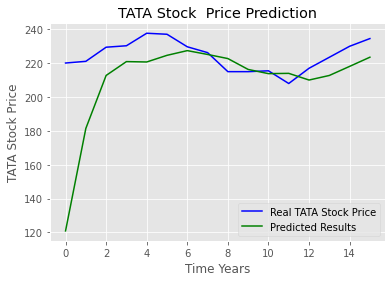

In [31]:
#Prediction 
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
input_data = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
input_data = input_data.reshape(-1,1)
input_data = scaler_data.transform(input_data)
x_test = []
for item in range(60,76):
    x_test.append(input_data[item-60:item,0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1], 1))
PSP = regression.predict(x_test)
PSP = scaler_data.inverse_transform(PSP)

#Plotting
plt.plot(RSP , color = 'blue' , label = 'Real TATA Stock Price')
plt.plot(PSP , color = 'green' , label = 'Predicted Results' )
plt.title('TATA Stock  Price Prediction')
plt.xlabel('Time Years')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()